# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


# Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [3]:
data = pd.read_csv('cost_revenue_dirty.csv')

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [4]:
print(f"num of rows: {data.shape[0]}, num of cols: {data.shape[1]}")

num of rows: 5391, num of cols: 6


In [5]:
data.isna().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [9]:
data.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
4874,2821,4/12/2015,Krampus,"$15,000,000","$61,788,393","$42,725,475"
1835,2779,6/21/2002,Juwanna Mann,"$15,600,000","$13,771,817","$13,571,817"
106,3501,7/11/1963,It's a Mad Mad Mad Mad World,"$9,400,000","$60,000,000","$46,300,000"
4237,846,9/21/2012,Trouble with the Curve,"$60,000,000","$47,818,913","$35,763,137"
232,3165,1/1/1978,The Boys from Brazil,"$12,000,000","$19,000,000","$19,000,000"


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [12]:
data["USD_Production_Budget"] = data["USD_Production_Budget"].apply(lambda x: x.replace("$", "").replace(",", "")).astype("int")

In [13]:
data["USD_Worldwide_Gross"] = data["USD_Worldwide_Gross"].apply(lambda x: x.replace("$", "").replace(",", "")).astype("int")

In [14]:
data["USD_Domestic_Gross"] = data["USD_Domestic_Gross"].apply(lambda x: x.replace("$", "").replace(",", "")).astype("int")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [17]:
data["Release_Date"] = pd.to_datetime(data["Release_Date"])

### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [18]:
data.describe()

,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,"5,391.00",5391,"5,391.00","5,391.00","5,391.00"
mean,"2,696.00",2003-09-19 15:02:02.203672704,"31,113,737.58","88,855,421.96","41,235,519.44"
min,1.00,1915-08-02 00:00:00,"1,100.00",0.00,0.00
25%,"1,348.50",1999-12-02 12:00:00,"5,000,000.00","3,865,206.00","1,330,901.50"
50%,"2,696.00",2006-06-23 00:00:00,"17,000,000.00","27,450,453.00","17,192,205.00"
75%,"4,043.50",2011-11-23 00:00:00,"40,000,000.00","96,454,455.00","52,343,687.00"
max,"5,391.00",2020-12-31 00:00:00,"425,000,000.00","2,783,918,982.00","936,662,225.00"
std,"1,556.39",NaN,"40,523,796.88","168,457,757.00","66,029,346.27"


In [22]:
print("Average production budget: {:.2f}".format(data["USD_Production_Budget"].mean()))

Average production budget: 31113737.58


In [23]:
print("Average world wide gross revenue: {:.2f}".format(data["USD_Worldwide_Gross"].mean()))

Average world wide gross revenue: 88855421.96


In [24]:
print("minimum for worldwide and domestic gross revenue: {}, {}".format(
    data["USD_Worldwide_Gross"].min(), data["USD_Domestic_Gross"].min()
    ))

minimum for worldwide and domestic gross revenue: 0, 0


In [26]:
low_budget_movie = data[data["USD_Production_Budget"] <= data["USD_Production_Budget"].quantile(0.25)]

In [27]:
(low_budget_movie["USD_Domestic_Gross"] > low_budget_movie["USD_Production_Budget"]).mean()

0.4079221681723419

In [28]:
print(f"""highest production budget: {data['USD_Production_Budget'].max()}, 
      the movie is {data["Movie_Title"][data["USD_Production_Budget"].idxmax()]}""")

highest production budget: 425000000, 
      the movie is Avatar


In [29]:
print(f"""highest worldwide revenue: {data['USD_Worldwide_Gross'].max()}, 
      the movie is {data["Movie_Title"][data["USD_Worldwide_Gross"].idxmax()]}""")

highest worldwide revenue: 2783918982, 
      the movie is Avatar


In [37]:
print(f"Revenue that lowest budget movie made: {data['USD_Worldwide_Gross'][data['USD_Production_Budget'][data['USD_Production_Budget'] > 0].idxmin()]}")

Revenue that lowest budget movie made: 181041


In [39]:
nonzero_budget = data[data["USD_Production_Budget"] > 0]
nonzero_budget.loc[nonzero_budget["USD_Production_Budget"].idxmin()]

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object

In [31]:
print("Revenue that highest budget movie made: {}".format(data["USD_Worldwide_Gross"][data["USD_Production_Budget"].idxmax()]))

Revenue that highest budget movie made: 2783918982


# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [33]:
print(f"number of movies that have $0 domestic gross: {(data['USD_Domestic_Gross'] == 0).sum()}")

number of movies that have $0 domestic gross: 512


In [34]:
data[data["USD_Domestic_Gross"] == 0]["USD_Production_Budget"].max()

175000000

In [41]:
data[data["USD_Domestic_Gross"] == 0].sort_values("USD_Production_Budget", ascending=False).head(10)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
4294,566,2012-12-31,Astérix et Obélix: Au service de Sa Majesté,77600000,60680125,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
5338,879,2017-04-08,The Dark Tower,60000000,0,0
5389,1119,2020-12-31,Hannibal the Conqueror,50000000,0,0
4295,1230,2012-12-31,Foodfight!,45000000,73706,0


In [36]:
data.loc[data[data["USD_Domestic_Gross"] == 0]["USD_Production_Budget"].idxmax()]

Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 5388, dtype: object

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [42]:
zero_gross_worldwide = data[data["USD_Worldwide_Gross"] == 0]

In [43]:
zero_gross_worldwide.shape

(357, 6)

In [45]:
zero_gross_worldwide.loc[zero_gross_worldwide["USD_Production_Budget"].idxmax()]

Rank                                      96
Release_Date             2020-12-31 00:00:00
Movie_Title                      Singularity
USD_Production_Budget              175000000
USD_Worldwide_Gross                        0
USD_Domestic_Gross                         0
Name: 5388, dtype: object

### Filtering on Multiple Conditions

In [46]:
data[(data["USD_Domestic_Gross"] == 0) & (data["USD_Worldwide_Gross"] > 0)]

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [48]:
international_releases = data.query("USD_Domestic_Gross == 0 and USD_Worldwide_Gross > 0")

In [50]:
print(f"number of international releases: {international_releases.shape[0]}")

number of international releases: 155


In [49]:
international_releases.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0


### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [51]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [56]:
data_clean = data[data["Release_Date"] <= scrape_date]

In [57]:
print(f"number of film are not released yet: {data.shape[0] - data_clean.shape[0]}")

number of film are not released yet: 7


In [58]:
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [61]:
perc = (data_clean["USD_Worldwide_Gross"] < data_clean["USD_Production_Budget"]).mean()
print(f"percentage of movies that lost money: {perc:.2%}")

percentage of movies that lost money: 37.28%


# Seaborn for Data Viz: Bubble Charts

In [64]:
import seaborn as sns

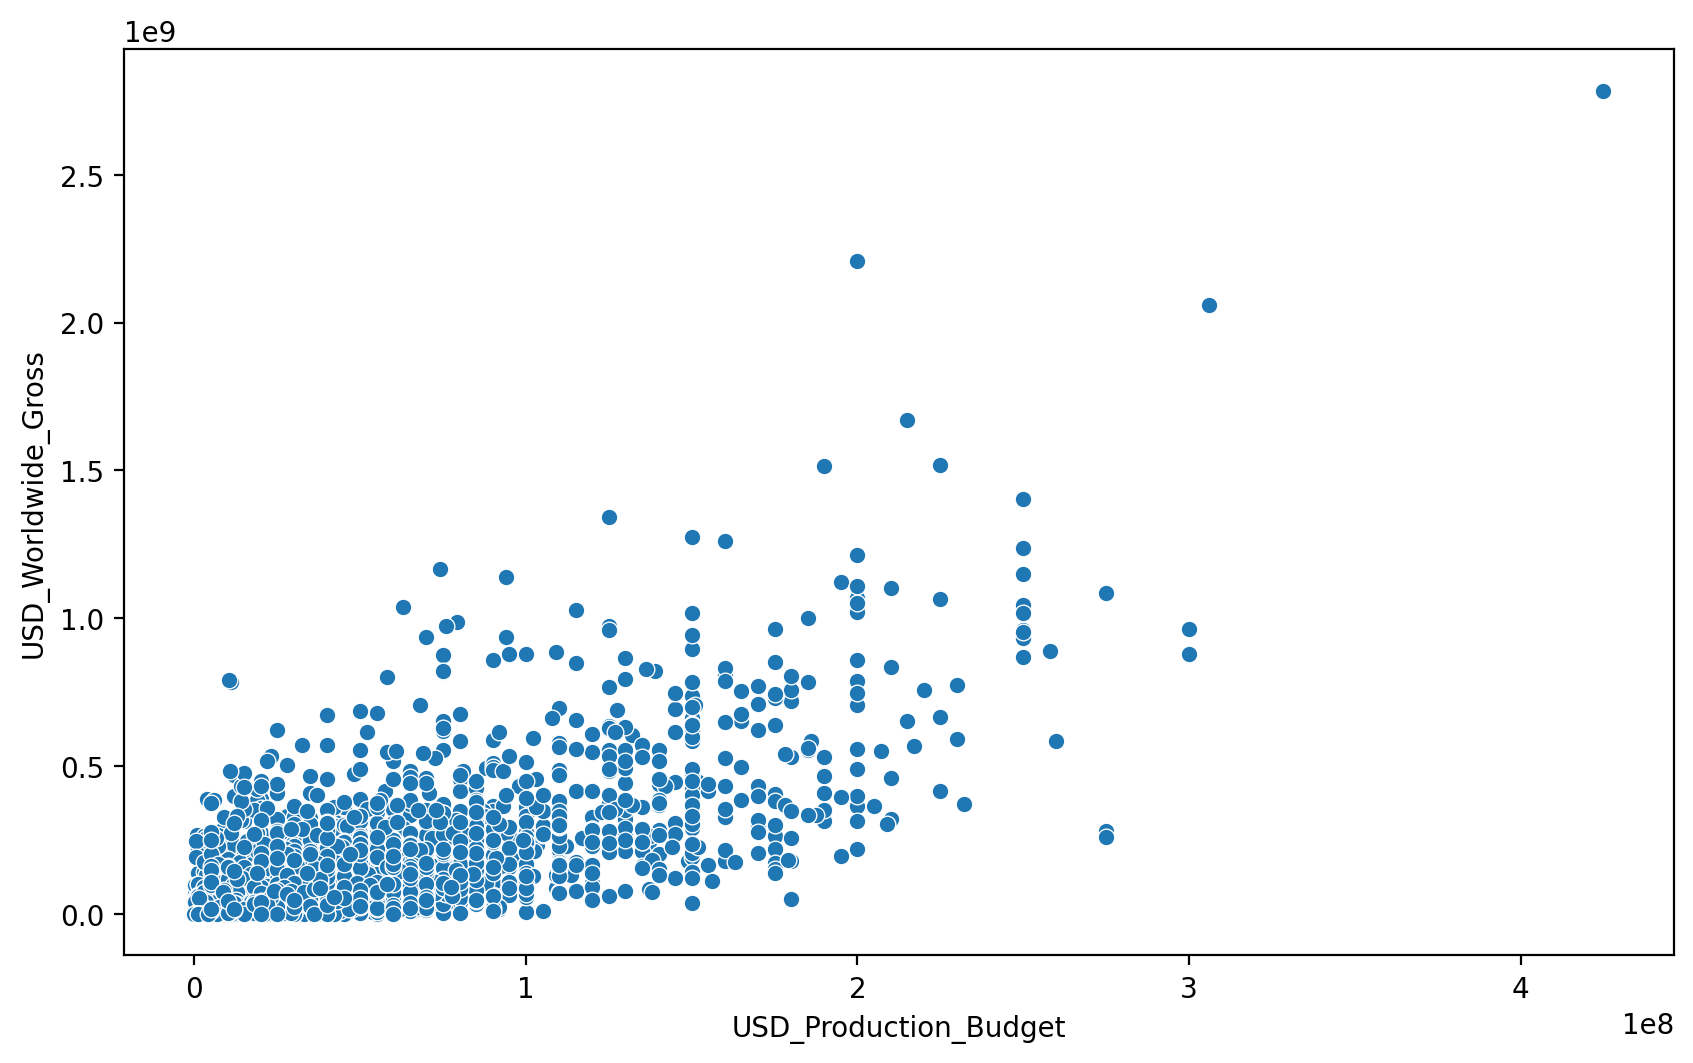

In [66]:
plt.figure(figsize=(10,6), dpi=200)

sns.scatterplot(data=data_clean, x="USD_Production_Budget", y="USD_Worldwide_Gross")


plt.show()

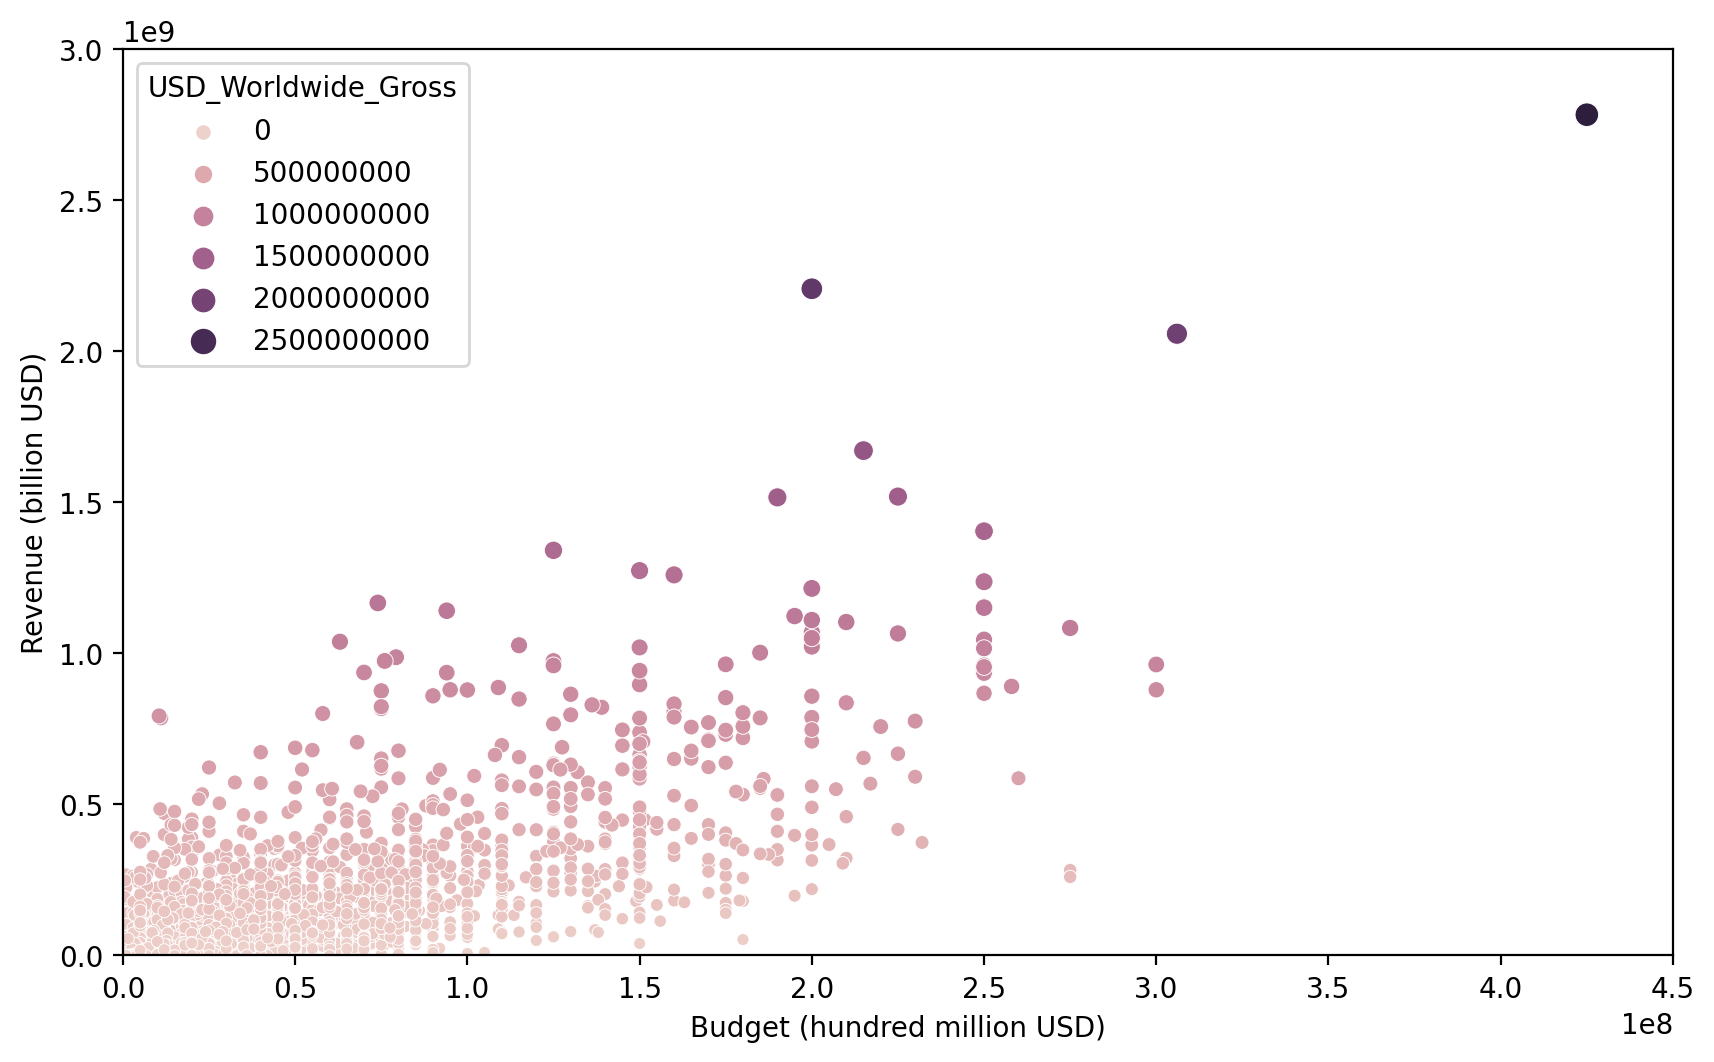

In [69]:
plt.figure(figsize=(10,6), dpi=200)

ax = sns.scatterplot(
    data=data_clean, 
    x="USD_Production_Budget", 
    y="USD_Worldwide_Gross",
    hue="USD_Worldwide_Gross", # color 
    size="USD_Worldwide_Gross", # size
)

ax.set(ylim=(0, 3000000000), 
       xlim=(0, 450000000), 
       xlabel="Budget (hundred million USD)", 
       ylabel="Revenue (billion USD)")


plt.show()

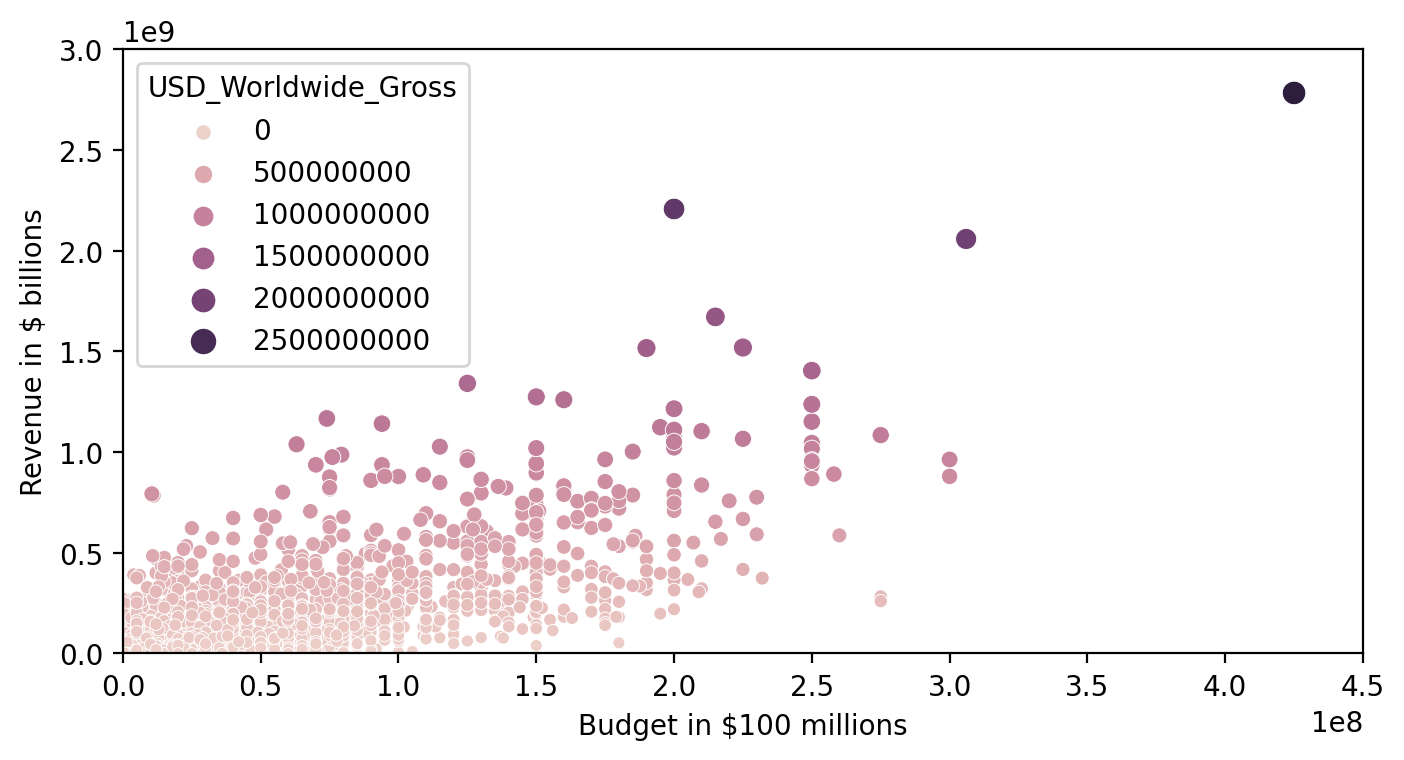

In [70]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x='USD_Production_Budget', 
                     y='USD_Worldwide_Gross',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 3000000000),
       xlim=(0, 450000000),
       ylabel='Revenue in $ billions',
       xlabel='Budget in $100 millions',)
 
plt.show()

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



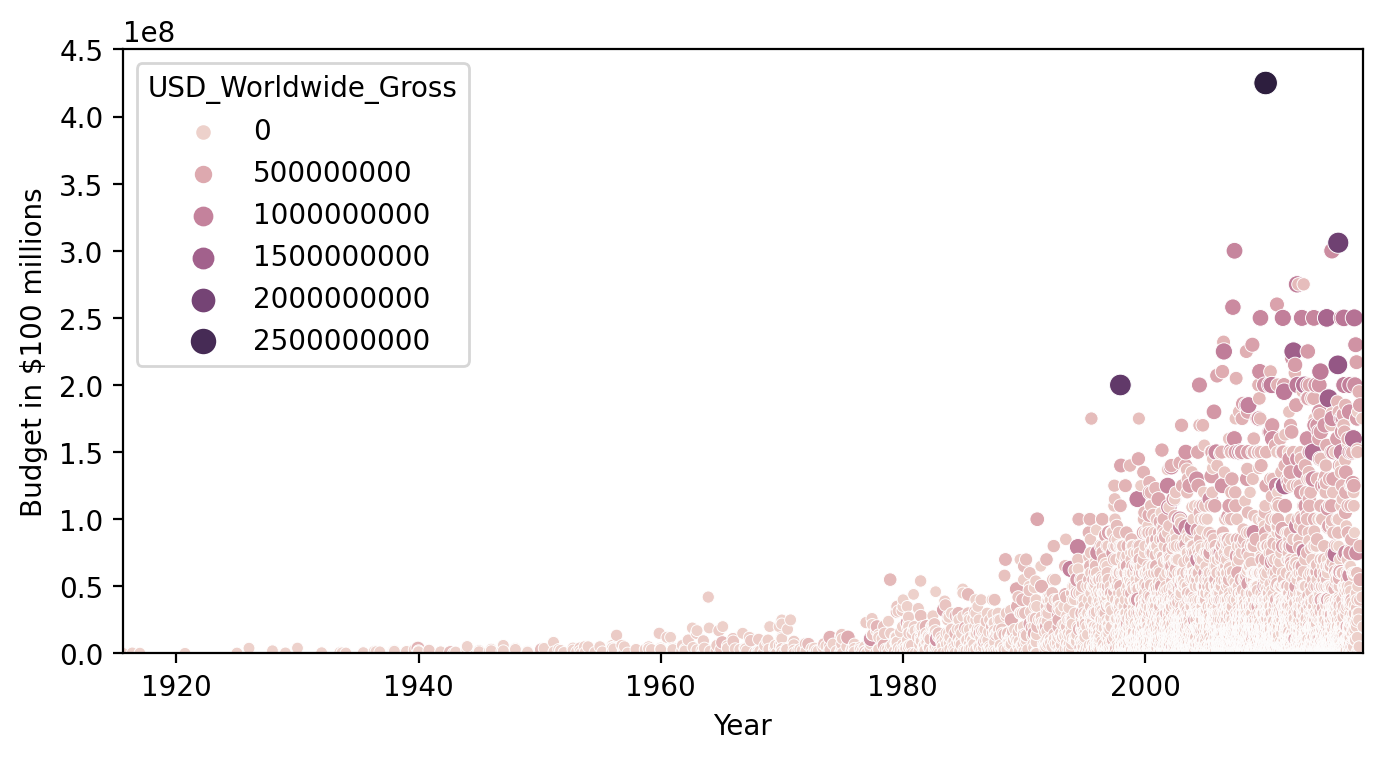

In [75]:
plt.figure(figsize=(8,4), dpi=200)
ax = sns.scatterplot(data=data_clean,
                     x="Release_Date", 
                     y='USD_Production_Budget',
                     hue='USD_Worldwide_Gross', # colour
                     size='USD_Worldwide_Gross',) # dot size
 
ax.set(ylim=(0, 450000000),
       xlim=(data_clean["Release_Date"].min(), data_clean["Release_Date"].max()),
       ylabel='Budget in $100 millions',
       xlabel='Year',)
 
plt.show()

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [78]:
data_clean["Decade"] = data_clean["Release_Date"].apply(lambda x: x.year // 10 * 10)

<ipython-input-78-5b765120789e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Decade"] = data_clean["Release_Date"].apply(lambda x: x.year // 10 * 10)


In [79]:
data_clean.sample(5)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
1297,3912,1999-08-27,Stiff Upper Lips,5700000,69582,69582,1990
2491,2571,2005-09-09,The Exorcism of Emily Rose,18000000,144529078,75072454,2000
1933,5066,2002-12-07,Never Again,500000,308793,307631,2000
4124,486,2012-03-23,The Hunger Games,80000000,677923379,408010692,2010
1406,1299,2000-04-02,Scream 3,40000000,161838076,89138076,2000


### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [80]:
old_films = data_clean[data_clean["Decade"] < 1970]
new_films = data_clean[data_clean["Decade"] >= 1970]

In [81]:
print(f"number of old films: {old_films.shape[0]}, number of new films: {new_films.shape[0]}")

number of old films: 153, number of new films: 5231


In [82]:
most_expensive_old_films = old_films.sort_values("USD_Production_Budget", ascending=False).head(10)
most_expensive_old_films

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,1963-12-06,Cleopatra,42000000,71000000,57000000,1960
150,2175,1969-12-16,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,1969-01-01,Sweet Charity,20000000,8000000,8000000,1960
118,2425,1965-02-15,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,1969-10-15,Paint Your Wagon,20000000,31678778,31678778,1960
110,2552,1964-01-01,The Fall of the Roman Empire,19000000,4750000,4750000,1960
98,2546,1962-08-11,Mutiny on The Bounty,19000000,13680000,13680000,1960
114,2670,1964-10-22,My Fair Lady,17000000,72070955,72000000,1960
102,2698,1963-01-01,55 Days at Peking,17000000,10000000,10000000,1960
125,2831,1966-10-10,Hawaii,15000000,34562222,34562222,1960


# Seaborn Regression Plots

<Axes: xlabel='USD_Production_Budget', ylabel='USD_Worldwide_Gross'>

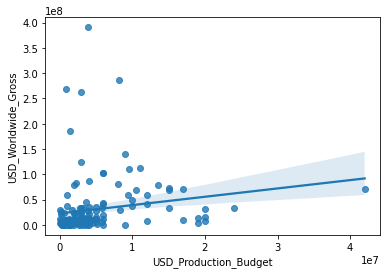

In [83]:
sns.regplot(data=old_films, x="USD_Production_Budget", y="USD_Worldwide_Gross")

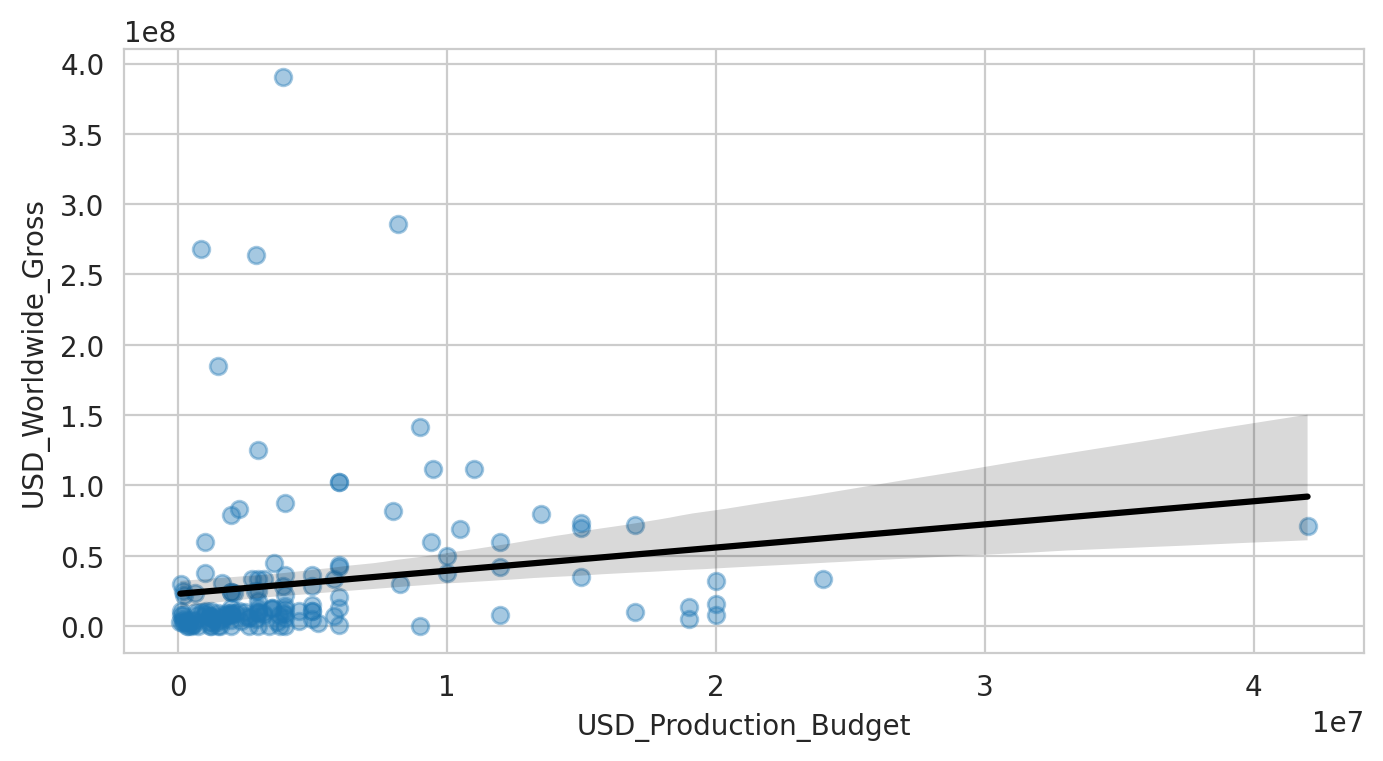

In [90]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.regplot(
        data=old_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        scatter_kws={"alpha": 0.4},
        line_kws={"color": "black"},
    )

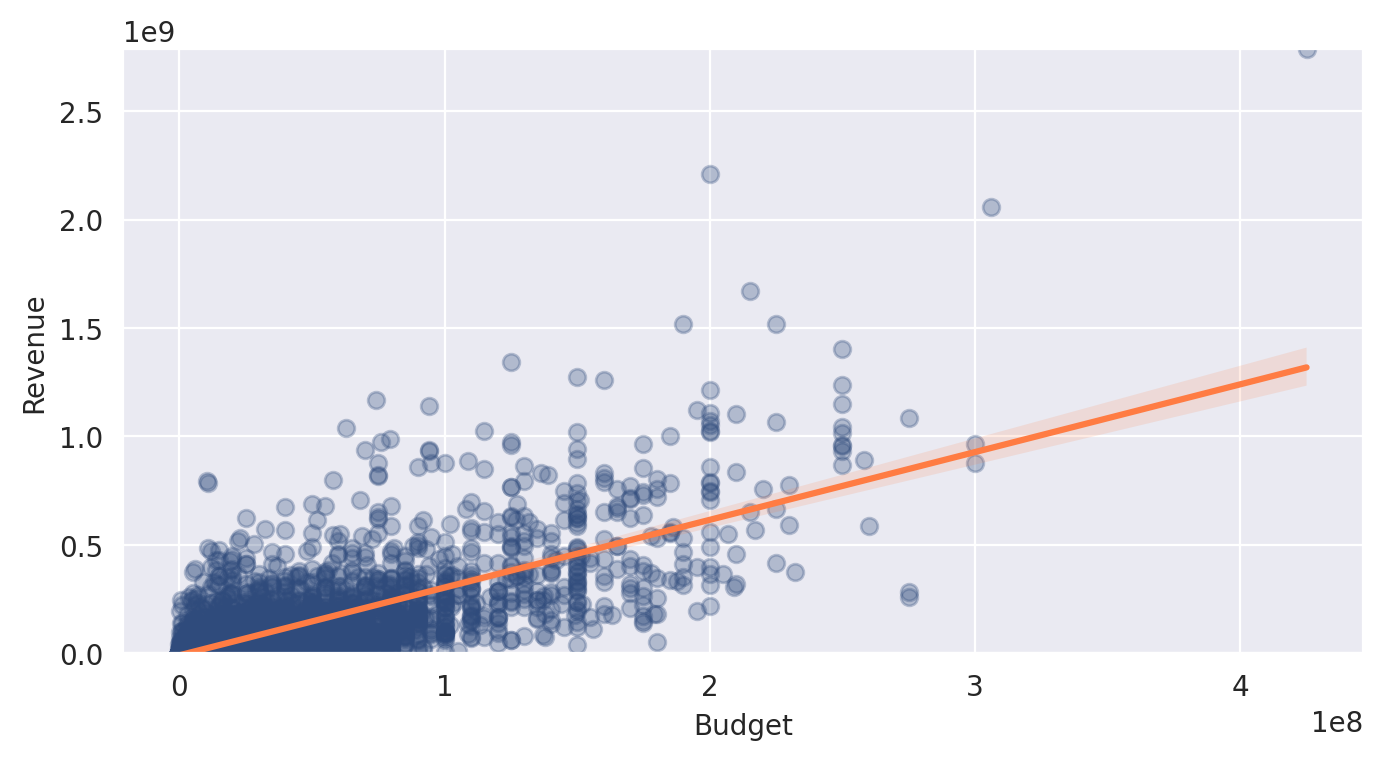

In [93]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    ax = sns.regplot(
        data=new_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        color="#2f4b7c",
        scatter_kws={"alpha": 0.3},
        line_kws={"color": "#ff7c43"},
    )
    ax.set(
        ylim=(0, data["USD_Worldwide_Gross"].max()),
        xlabel="Budget",
        ylabel="Revenue"
    )

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
regression = LinearRegression()

In [98]:
# Explanatory variable(s)
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])

# Response variable
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

regression.fit(X, y)

LinearRegression()

In [99]:
regression.coef_, regression.intercept_

(array([[3.12259592]]), array([-8650768.00661027]))

In [100]:
regression.score(X, y)

0.5577032617720403

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [101]:
regression2 = LinearRegression()

X = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])
regression2.fit(X, y)
print(regression2.coef_, regression2.intercept_)
print(regression2.score(X, y))

[[1.64771314]] [22821538.63508039]
0.02937258620576877


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [106]:
regression.predict(pd.DataFrame(
    {"USD_Production_Budget": [350e6]}
    ))

array([[1.0842578e+09]])

In [107]:
regression2.predict(pd.DataFrame(
    {"USD_Production_Budget": [350e6]}
    ))

array([[5.99521139e+08]])

In [108]:
22821538 + 1.64771314 * 350000000


599521137.0